# Linear Models

**Linear Models** တွေဟာ ရိုးရှင်းတဲ့ Statistical/Machine-Learning model အမျိုးအစားဖြစ်တယ်။ လုပ်တဲ့ function ပေါ်မူတည်ပြီး Linear Models တွေကို ၂ မျိုး ခွဲခြားနိုင်တယ်။ 

* Linear Regression and
* Logistic Regression

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy import linalg as sp_la, stats as sp_st
from sklearn import datasets as sk_ds 
from sklearn import linear_model as sk_lm
from sklearn import preprocessing as sk_pp
from sklearn import model_selection as sk_ms
from sklearn import metrics as sk_metrics

## Dataset

ဒီ notes မှာ California Housing dataset ကို သုံးကြမယ်။ 

In [ ]:
df_X, ds_y = sk_ds.fetch_california_housing(return_X_y=True, as_frame=True)
df_X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
ds_y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

train/test split ခွဲအပြီးမှာ training ထဲက random sample (row) 50 ကို visualization အတွက် ခွဲထားမယ်။

In [ ]:
X_tr, X_ts, y_tr, y_ts = sk_ms.train_test_split(df_X.values, ds_y.values, random_state=42)
vis_selection = np.random.choice(a=X_tr.shape[0], size=50, replace=False)
X_vis, y_vis = X_tr[vis_selection, :], y_tr[vis_selection]
X_vis.shape, y_vis.shape

((50, 8), (50,))

Column တခုချင်းစီကို `MedHouseVal` (y) နဲ့ plot ဆွဲကြည့်တဲ့အခါမှာ `MedInc` မြင့်လေလေ၊ `MedHouseVal` များလေလေလို့ မြင်ရတယ်။ 

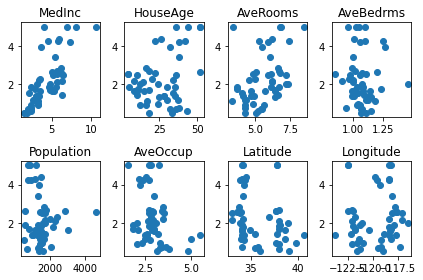

In [ ]:
fig, plts = plt.subplots(2, 4)
for idx, col in enumerate(df_X.columns):
  pl = plts[idx//4,idx%4]  
  pl.scatter(x=X_vis[:, idx], y=y_vis)
  pl.set_title(col)
plt.tight_layout()
plt.show()

ဒါကြောင့် ဒီ Notes မှာ `MedInc` ကို ဥပမာအနေနဲ့ သုံးမယ်။

> ဒီနေရာမှာ $X$ က `MedInc` column ဖြစ်ပြီး $y$ က `MedHouseVal` ဖြစ်မယ်။

## Linear Regression

### Baseline Model

ပထမဆုံး X (`MedInc`) ကို မစဉ်းစားပဲ y (`MedHouseVal`) ကို အမြဲ သူ့ရဲ့ mean $\bar{y}$ လို့ပဲ ရမ်းရွှီးတဲ့ function ကို စဉ်းစားကြည့်ရအောင်။ 

$$f_{\text{mean}}(x) = \bar{y}$$

> ဆိုလိုတာက parameter $x$ ဟာ ဘာပဲ ဖြစ်ဖြစ် $y$ ကို $\bar{y}$ လို့ ခန့်မှန်းတာဖြစ်တယ်။

သူ့ရဲ့ `mean_square_error` က ... 

$$\text{MSE}(f_{\text{mean}}) = \sum_{y_i \in y} {\frac{(y_i - \bar{y})^2}{m}} $$

> အဲဒီ (ရမ်းရွှီးတဲ့) function ကို `mean_square_error` အနည်းဆုံးပဲ။

> အပေါ်က `mean_square_error` အောက်က $m$ ပိုင်းခြေက ကိန်းသေ (constant) မို့ ဖြုတ်ထားလိုက်ပြီး `sum_square` လို့ပဲ ပြောမယ်။

> $$\text{SS}(f_{\text{mean}}) = \sum_{y_i \in y} (y_i - \bar{y})^2 $$



In [ ]:
eg_idx = 0
eg_col = "MedInc"
eg_X = X_vis[:, eg_idx]
eg_y = y_vis

X = 0
Y = 1
mean_MedHouseVal = eg_y.mean()

@np.vectorize
def f_mean(x):
  return mean_MedHouseVal

def ss(func, x, y):
  error = func(x) - y
  return np.dot(error, error.T)

ss_f_mean = ss(f_mean, eg_X, y_vis)
print ("Sum Square error : {}".format(ss_f_mean))

Sum Square error : 82.68601248036799


In [ ]:
mean_MedHouseVal

2.2190008

အောက်က ပုံမှာ $f_{\text{mean}}$ ကို အနီရောင်နဲ့ ပြထားတယ်။ horizontal axis က ဘာဖြစ်နေနေ အဖြေကို တခုတည်း ထုတ်ပေးလို့ ရေပြင်ညီတန်းနေတာ ဖြစ်တယ်။

In [ ]:
def get_vis_for_f(f, X):
  return np.array([
    [X.min(), f(X.min())], 
    [X.max(), f(X.max())]
  ]).T

[]

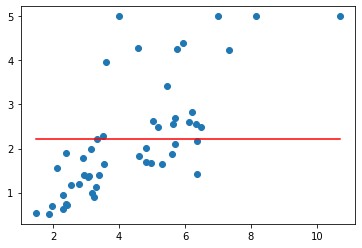

In [ ]:
f_mean_vis = get_vis_for_f(f_mean, eg_X)

plt.scatter(x=X_vis[:, eg_idx], y=y_vis)
plt.plot(f_mean_vis[X], f_mean_vis[Y], color="red")
plt.plot()

function ပုံစံခွက် (model) က 

$$
f_{a, b}(x_i) = a * x_i + b 
$$

လို့ထားပါ။ 

ဒီ function ကနေ မှန်းဆ ရလာတဲ့ $y$ တန်ဖိုးတွေကို $\hat{y}_{a, b}$ လို့ ရေးပါမယ်။

ဒါဆိုရင် $f_{a, b}$ အတွက် `sum_square` က 

$$
\text{SS}(f_{a, b}) = \sum_{y_i \in y}{(y_i - \hat{y})^2}
$$

ဖြစ်လိမ့်မယ်။

$b=0$ လို့ ထားလိုက်မယ်ဆိုရင် ဖြစ်နိုင်တဲ့ $a$ တန်ဖိုးတွေထဲက ၁၀ ခုအတွက် အကုန်လုံးအတွက် `sun_square` ကို အောက်မှာတွက်ပြထားတယ်။

In [ ]:
import math

@np.vectorize
def f_by_angle(angle, y_intercept):
  angle_rad = math.radians(angle)
  dy, dx = math.sin(angle_rad), math.cos(angle_rad)
  coef = dy/dx
  return lambda x : y_intercept + coef * x

funcs = np.array(f_by_angle(np.arange(0, 90, 10), y_intercept=0)).T

for idx, f in enumerate(funcs):
  ss_f = ss(f, eg_X, y_vis)
  print ("Sum Square error of f_{} : {}".format(idx, ss_f))

Sum Square error of f_0 : 328.8842400004
Sum Square error of f_1 : 160.83972713648336
Sum Square error of f_2 : 60.72042110696141
Sum Square error of f_3 : 45.48646675532529
Sum Square error of f_4 : 170.12632872963744
Sum Square error of f_5 : 587.7614861675272
Sum Square error of f_6 : 1783.6366027451745
Sum Square error of f_7 : 5851.7349334321425
Sum Square error of f_8 : 30839.01038959032


ထို့နည်းတူပဲ ဖြစ်နိုင်တဲ့ $a$ တန်ဖိုး ၁၀ ခုရဲ့ function တွေကို အရောင် ၁၀ မျိုးနဲ့ အောက်က ပုံမှာ ပြထားတယ်။ အဲဒီထဲမှာ စတုတ္ထလိုင်း ($f_{\text{id}=3, 0}$) ရဲ့ `sun_square` က အပေါ်မှာ တွက်ပြထားတဲ့ 42.47 ဖြစ်ပြီး အနည်းဆုံးဖြစ်တယ်။

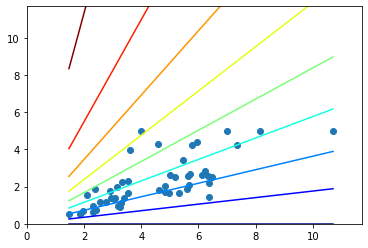

In [ ]:
colors = plt.cm.jet(np.linspace(0, 1, funcs.shape[0]))

plt.xlim(0, eg_X.max()+1)
plt.ylim(0, eg_X.max()+1)
plt.scatter(x=X_vis[:, eg_idx], y=y_vis)
for f, c in zip(funcs, colors):
  f_vis = get_vis_for_f(f, X_vis[:, eg_idx])
  plt.plot(f_vis[X], f_vis[Y], color=c)
plt.show()

Linear Regression ဆိုတာ တခြားမဟုတ်၊ `sum_square` အနည်းဆုံး ဖြစ်စေမဲ့ $a$ နဲ့ $b$ ကို ရှာတာ ဖြစ်တယ်။ အောက်မှာတော့ `sklearn.linear_model.LinearRegression` ကိုသုံးပြီး $a$ နဲ့ $b$ ကို ရှာပြထားတယ်။

In [ ]:
lr_model = sk_lm.LinearRegression()
lr_model.fit(X_tr[:, eg_idx].reshape(-1, 1), y_tr)

a, b = lr_model.coef_[0], lr_model.intercept_
print("a = {} and b = {}".format(a, b))

a = 0.4178808698303916 and b = 0.4496756419968606


ပြီးတော့ $f_{\text{mean}}$ လိုင်း (red) နဲ့ $f_{\text{best}}$ လိုင်း (green) ကို plot ပြထားတယ်။

sum square for mean fit is : 20655.194207852466
sum square for best fit is : 10858.375244667146


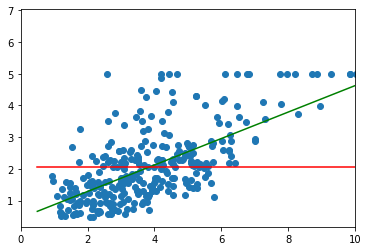

In [ ]:
f_best = lambda x : a * x + b
f_mean = lambda x : y_tr.mean()

print("sum square for mean fit is : {}".format(ss(f_mean, X_tr[:, eg_idx], y_tr)))
print("sum square for best fit is : {}".format(ss(f_best, X_tr[:, eg_idx], y_tr)))

plt.xlim(0, 10)
plt.scatter(x=X_tr[::50, eg_idx], y=y_tr[::50])

f_best_vis = get_vis_for_f(f_best, X_tr[:, eg_idx])
f_mean_vis = get_vis_for_f(f_mean, X_tr[:, eg_idx])

plt.plot(f_best_vis[X], f_best_vis[Y], color="green")
plt.plot(f_mean_vis[X], f_mean_vis[Y], color="red")
plt.show()

### Extending to More than 1 Dimensions

အခုထိ ကျနော်တို့ `MedInc` dimension (feature/column) တခုကိုပဲ သုံးရသေးတယ်။ 

တခြား dimension တွေကိုပါ ထည့်ဖို့ function ပုံစံခွက် (model) ကို ဒီလိုပြင်ရမယ်။ 

$$f_{(a_1, a_2, a_3, ..., a_n), b}(X_i) = a_1 x_{i, 1} + a_2 x_{i, 2} + a_3 x_{i, 3} + ... + a_n x_{i, n} + b$$

where 

$X_i$ ဆိုတာ $(x_{i, 1}, x_{i,2}, x_{i,3}, ..., x_{i,n})$ ဆိုတဲ့ feature $n$ ခုပါတဲ့ vector တခု (row တခု) ဖြစ်တယ်။

ဒီဟာကို Matrix ပုံစံနဲ့ ပြင်ရေးတော့ ... 

$$f_{A, b}(X_i) = AX_i^T + b$$

where

$$A = (a_1, a_2, a_3, ..., a_n)$$

ဒီနေရာမှာ $x^Ty$ ဟာ scalar ဖြစ်ရင် $x^Ty = (x^Ty)^T = xy^T$ ဖြစ်တာမို့ ... 

$$f_{A, b}(X_i) = X_iA^T + b$$

လို့ပြောင်းရေးနိုင်တယ်။ 

ပြီးတော့ ရေးရိုးရေးစဉ်အရ $A$ ကို $w$ လို့ အစားထိုးလိုက်ရင် 

$$f_{w, b}(X_i) = X_iw^T + b$$

ဆိုပြီးရတယ်။

### Comparing Models

**model** တွေကို နှိုင်းယှဉ်တယ်ဆိုတာ **function** တွေကို နှိုင်းယှဉ်တာပဲ ဖြစ်တယ်။ 

> သတိထားကြည့်ရင် အခုချိန်အထိ ကျနော်တို့ `X_ts` နဲ့ `y_ts` ကို မထိသေးတာကို တွေ့ရလိမ့်မယ်။ 

In [ ]:
print ("training r2_score : {}".format(sk_metrics.r2_score(y_true=y_tr, y_pred=lr_model.predict(X_tr[:, eg_idx].reshape(-1, 1)))))
print ("testing r2_score : {}".format(sk_metrics.r2_score(y_true=y_ts, y_pred=lr_model.predict(X_ts[:, eg_idx].reshape(-1, 1)))))

training r2_score : 0.47430292180263645
testing r2_score : 0.47083837938023365


$R^2$ score အကြောင်းကို မပြောခင်မှာ စဉ်းစားပုံကို အရင်ပြောမယ်။ 

* $f_{\text{mean}}$ ကနေ $f_{\text{best}}$ ဖြစ်တော့ `sum_square` ဘယ်လောက် လျော့သွားလဲ။ 

$$\text{difference in SS}(f_{\text{mean}}, f_{\text{best}}) = \text{SS}(f_{\text{mean}}) - \text{SS}(f_{\text{best}}) $$

ဒီတိုင်းထားရင် ရာခိုင်နှုန်း (%) မရနိုင်တဲ့အတွက် $\text{SS}(f_{\text{mean}})$ နဲ့ စားပေးလိုက်တယ်။ အဲဒါ $R^2$ ပဲ။ 

$$R^2 = \frac{\text{SS}(f_{\text{mean}}) - \text{SS}(f_{\text{best}})}{\text{SS}(f_{\text{mean}})}$$

$$=\frac{\text{SS}(f_{\text{mean}}))}{\text{SS}(f_{\text{mean}})} - \frac{\text{SS}(f_{\text{best}})}{\text{SS}(f_{\text{mean}})}$$

$$=1 - \frac{\sum_{y_i \in y}{(y_i - \hat{y})^2}}{\sum_{y_i \in y}{(y_i - \bar{y})^2}}$$

အဲဒါ [ဒီလင့်ခ်](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) မှာပေးထားတဲ့ အောက်က formula ပဲ။ 

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

> $R^2$ ဟာ ရာခိုင်နှုန်းဖြစ်တဲ့အတွက် 1 (100%) ထက် ဘယ်တော့မှ မကြီးဘူး။

#### Problems with $R^2$

ခက်တာက $R^2$ က data ပေါ်မှာ မှီခိုနေတယ်။ 

1. data point ၂ point (2 rows/samples) ပဲ ရှိရင် $\text{SS}(f_{\text{candidate}})$ ဟာ အမြဲ 0 ဖြစ်တယ်။ 

2. column (feature/dimension) တွေ ထပ်ထည့်ရင် ထည့်သလို **random chance** ကြောင့် SS($f_{\text{candidate}}$) ဟာ တဖြည်းဖြည်း ငယ်လာတယ်။

အဲဒီ ပြဿနာ ၂ ရပ်ကို ဖြေရှင်းဖို့ F-test ဆိုတာကို သုံးရတယ်။ 

$$F = \frac{R^2/n}{(1-R^2)/(m - n - 1)}$$

where $m$ is number of samples and $n$ is number of features (dimension/columns) used.

> Notice that in statistics it is $$F = \frac{R^2/k}{(1-R^2)/(n - k - 1)}$$ because it is customary to denote number of samples as $n$ in statistics.

မျက်စိ မလည်အောင် ၂ ပိုင်းခွဲပြီးရှင်းမယ်။

* ပိုင်းဝေ (numerator) ကို ကြည့်ပါ။ $R^2/n$ ဆိုတော့ ဒီဂဏန်းဟာ variable (dimension/features/columns) များများသုံးလေ ငယ်လေလေဖြစ်မယ်။ ဒီတော့ F score ကောင်းချင်ရင် variable သုံးတာကို လျှော့ရမယ်။

* ပိုင်းခြေ (demoninator) ကိုကြည့်ပါ။ $$R^2=1 - \frac{\text{SS}(f_{\text{candidate}})}{\text{SS}(f_{\text{mean}})}$$ ဖြစ်တာမို့ $$1-R^2=\frac{\text{SS}(f_{\text{candidate}})}{\text{SS}(f_{\text{mean}})}$$ တနည်းအားဖြင့် candidate က variable တွေတိုးပေမဲ့ မှားမြဲမှားနေဆဲ error ပမာဏဖြစ်တယ်။ 

* အဲဒီ error ပမာဏကို $(m - n - 1)$ နဲ့ စားတာဟာ တကယ်လို့ $m$ က ($n$ ထက်) ငယ်ရင် ပိုင်းခြေ ကြီးလာလိမ့်မယ်။ ဒီတော့ F-score ကောင်းချင်ရင် $n$ ဟာ $m$ ထက် အများကြီး ပိုကြီးရမယ်။

> **Practical Notes:** F-score ကို ကိုယ့်ဟာကိုယ် အစအဆုံးတွက်တာနဲ့စာရင် library ခေါ်သုံးလိုက်တာ ပိုအဆင်ပြေပါတယ်။

In [ ]:
import statsmodels.api as sm
X_ = sm.add_constant(X_tr[:, eg_idx])
model_ = sm.OLS(y_tr, X_).fit()
print (model_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.396e+04
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:40:45   Log-Likelihood:                -19220.
No. Observations:               15480   AIC:                         3.844e+04
Df Residuals:                   15478   BIC:                         3.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4497      0.015     29.434      0.0

ဒီ F-score နဲ့ ပက်သက်ပြီး ၂ မျိုး လုပ်နိုင်တယ်။ 

* ပထမတမျိုးက variable တွေ အမျိုးမျိုးသုံးပြီး `fit` ထားတဲ့ model အမျိုးမျိုးရဲ့ `F-statistic` တွေကို နှိုင်းယှဉ်နိုင်တယ် (ပိုများလေ ပိုကောင်းလေ)။ 

* ဒုတိယတမျိုးက အပေါ်က code မှာ 

```
F-statistic:                 1.396e+04
Prob (F-statistic):               0.00
```

လို့ မြင်ရတဲ့အတွက် F-score ရဲ့ p-value (`Prob (F-statistic)`) ဟာ 0 လောက်နီးပါးငယ် (0.05 ထက်ငယ်) တဲ့အတွက် ဒီ F-score ဟာ မတော်တဆ ကောင်းသွားတာဖြစ်တယ်ဆိုတဲ့ **null-hypothesis** ကို ပယ်ချနိုင်တယ်။

> အတိုပြောရရင် မတော်တဆ မဟုတ်တဲ့ F-score တွေထဲက အကောင်းဆုံး F-score ကိုပေးတဲ့ dimension/feature/column/variable တွေနဲ့ model ဆောက်သင့်တယ်။